# PART 4 - Régréssions logistiques

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Classe executant une validation croisée en 5 itérations
def myscore(clf, X, y):
    xval = cross_val_score(clf, X, y, cv = 5)
    return xval.mean() *100

# Classe préparant le modèle
def Prepare_model(X):
    target = X.is_genuine
    X = X[['length', 'margin_low']]
    return X, target

# Classe permettant de visualiser le distribution des faux et vrais billets en fonction d'une variable
def plt_feature(feature, bins = 30):
    m = df[df.is_genuine == True][feature].dropna()
    s = df[df.is_genuine == False][feature].dropna()
    plt.hist([m, s], label=['True', 'False'], bins = bins)
    plt.legend(loc = 'upper left')
    plt.xlabel(feature)
    plt.title('Distribution relative en fonction de %s' %feature)
    plt.show()   

# Import du dataset

In [2]:
with open('data/part3.pkl', 'rb') as f:
    my_unpickler = pickle.Unpickler(f)
    df = my_unpickler.load()
    
df.head(10)

,length,margin_up,margin_low,height_left,height_right,diagonal,is_genuine,F1,F2,km cluster
0,112.83,2.89,4.52,104.86,104.95,171.81,True,2.153639,1.599709,0
1,113.29,2.87,4.01,103.74,103.70,171.67,True,-2.110416,-0.526039,0
2,113.84,2.88,4.40,103.76,103.76,171.83,True,-1.973152,-0.048102,0
3,113.63,3.12,3.73,103.78,103.65,171.80,True,-2.059795,-0.089105,0
4,113.55,2.27,5.04,103.70,103.75,172.05,True,-2.403180,0.412170,0
5,113.16,2.99,4.54,104.65,104.44,172.57,True,1.235656,2.983191,0
6,113.30,2.90,3.97,103.55,103.80,172.38,True,-2.079412,1.147980,0
7,113.38,3.19,3.54,103.65,103.37,171.58,True,-2.623934,-1.040133,0
8,113.53,3.33,4.06,103.51,103.75,171.96,True,-1.736309,-0.227631,0
9,112.47,3.02,4.63,104.34,104.20,172.14,True,0.727490,1.063881,0


# Séparation du dataset
Séparons le datasat en 2 :
- 80% pour l'entrainement du modèle qui aura été identifié et pour la validation croisée.
- 20% pour la validation finale de ce modèle.

In [3]:
# Séparation X (features) et y (is_genuine)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Séparation train data et test data avec la méthod sklearn : train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

# Reconstruction des datasets
dataset_eval = pd.concat((X_train, y_train), axis=1).reset_index(drop=True)
dataset_test = pd.concat((X_test, y_test), axis=1).reset_index(drop=True)

# Régression logistique multiple #1
Effectuons une régression logistique de 'is_genuine' en fonction de 'length', 'margin_low', 'height_left', 'height_right' et 'diagonal.

In [4]:
reg_log1 = smf.glm('is_genuine~length+margin_low+height_left+diagonal',
                   data=df, family=sm.families.Binomial()).fit()
print(reg_log1.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      165
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -4.1694
Date:                                       Fri, 18 Mar 2022   Deviance:                       8.3387
Time:                                               20:47:21   Pearson chi2:                     8.79
No. Iterations:                                           12                                         
Covariance Type:                                   nonrobust                      

# Régression logistique multiple #2
Nous excluons 'height_right'.

In [5]:
reg_log2 = smf.glm('is_genuine~length+margin_low+height_left+diagonal',
                   data=df, family=sm.families.Binomial()).fit()
print(reg_log2.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      165
Model Family:                                       Binomial   Df Model:                            4
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -4.1694
Date:                                       Fri, 18 Mar 2022   Deviance:                       8.3387
Time:                                               20:47:21   Pearson chi2:                     8.79
No. Iterations:                                           12                                         
Covariance Type:                                   nonrobust                      

# Régression logistique multiple #3
Nous excluons 'height_left'.

In [6]:
reg_log3 = smf.glm('is_genuine~length+margin_low+diagonal',
                   data=df, family=sm.families.Binomial()).fit()
print(reg_log3.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      166
Model Family:                                       Binomial   Df Model:                            3
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -4.1839
Date:                                       Fri, 18 Mar 2022   Deviance:                       8.3677
Time:                                               20:47:21   Pearson chi2:                     8.89
No. Iterations:                                           11                                         
Covariance Type:                                   nonrobust                      

# Régression logistique multiple #4
Nous excluons 'diagonal'.

In [7]:
reg_log4 = smf.glm('is_genuine~length+margin_low',
                   data=df, family=sm.families.Binomial()).fit()
print(reg_log4.summary())

                             Generalized Linear Model Regression Results                             
Dep. Variable:     ['is_genuine[False]', 'is_genuine[True]']   No. Observations:                  170
Model:                                                   GLM   Df Residuals:                      167
Model Family:                                       Binomial   Df Model:                            2
Link Function:                                         logit   Scale:                          1.0000
Method:                                                 IRLS   Log-Likelihood:                -4.2932
Date:                                       Fri, 18 Mar 2022   Deviance:                       8.5864
Time:                                               20:47:21   Pearson chi2:                     10.1
No. Iterations:                                           11                                         
Covariance Type:                                   nonrobust                      

Grâce à ces régressions logistiques nous avons déterminé que les variables 'length' et 'margin_low' sont les seules variables significativement valables pour identifier un faux billet d'un vrai.  
Voyons quels liens entretiennent ces varaibles avec is_genuine.

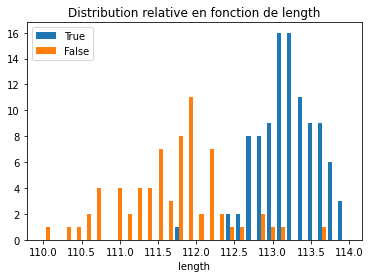

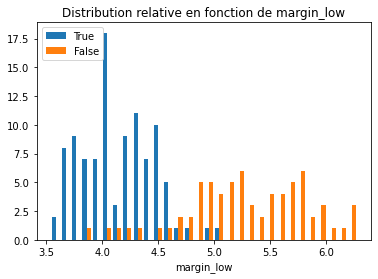

In [8]:
plt_feature('length')
plt_feature('margin_low')

# Création et évaluation du modèle
Créons un modèle de régression linéaire basé sur 'length' et 'margin_low' puis évaluons-le.

In [9]:
# Nous évaluerons d'abord notre modèle avec le dataset_train
X_eval, y_eval = Prepare_model(dataset_eval.copy())

# Création du modèle
model_lr = LogisticRegression()
model_lr.fit(X_eval, y_eval)

# Évaluation du modèle en validation croisée avec les données d'entrainement
eval_score = myscore(model_lr, X_eval, y_eval)

print(f"Le modèle trouvé nous donne {round(eval_score,2)}% de bonnes prédictions sur les données d'évaluation.")

Le modèle trouvé nous donne 100.0% de bonnes prédictions sur les données d'évaluation.


# Test du modèle
Nous allons maintenant tester le modèle sur les 20% du datasat originel reservés pour cela.

In [10]:
# Séparation X (features) et y (is_genuine) du dataset de test
X_test, y_test = Prepare_model(dataset_test.copy())

# Test du modèle sur ces données test.
test_score = model_lr.score(X_test, y_test)

print(f"Le modèle trouvé nous donne {round(test_score*100,2)}% de bonnes prédictions sur les données de test.")

Le modèle trouvé nous donne 91.18% de bonnes prédictions sur les données de test.


# Validation du modèle
Il convient maintenant de valider le modèle en l'entrainant sur l'ensemble du jeu de données originel

In [11]:
# Séparation X (features) et y (is_genuine) du dataset initial
X, y = Prepare_model(df.copy())

# Validation du modèle sur le jeu de donnée initial
valid_score = model_lr.score(X,y)

print(f"Le modèle trouvé nous donne {round(valid_score*100,2)}% de bonnes prédictions sur l'ensemble des données'.")

Le modèle trouvé nous donne 98.24% de bonnes prédictions sur l'ensemble des données'.


# Sauvegarde du model

In [12]:
with open('data/model.pkl', 'wb') as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(model_lr)